0 [('Seashells', 6), ('Pizzas', 5), ('Wasabi', 4), ('Seashells', 3), ('Pizzas', 2), ('Wasabi', 1), ('Seashells', 0)]
Expected Arbitrage: 1.114730532864, Actual Arbitrage: 1.114730532864
Starting Amount: 2000000 seashells, After Trades: 2229461.065728
1 [('Seashells', 6), ('Pizzas', 5), ('Wasabi', 4), ('Seashells', 3), ('Pizzas', 2), ('Seashells', 1)]
Expected Arbitrage: 1.0569693887999998, Actual Arbitrage: 1.0569693888
Starting Amount: 2000000 seashells, After Trades: 2113938.7776
2 [('Seashells', 6), ('Pizzas', 5), ('Pizzas', 4), ('Wasabi', 3), ('Seashells', 2)]
Expected Arbitrage: 1.055808, Actual Arbitrage: 1.055808
Starting Amount: 2000000 seashells, After Trades: 2111616.0
3 [('Seashells', 6), ('Pizzas', 5), ('Wasabi', 4), ('Seashells', 3)]
Expected Arbitrage: 1.055808, Actual Arbitrage: 1.055808
Starting Amount: 2000000 seashells, After Trades: 2111616.0
4 [('Seashells', 6), ('Pizzas', 5), ('Seashells', 4)]
Expected Arbitrage: 1.0010999999999999, Actual Arbitrage: 1.001099999999

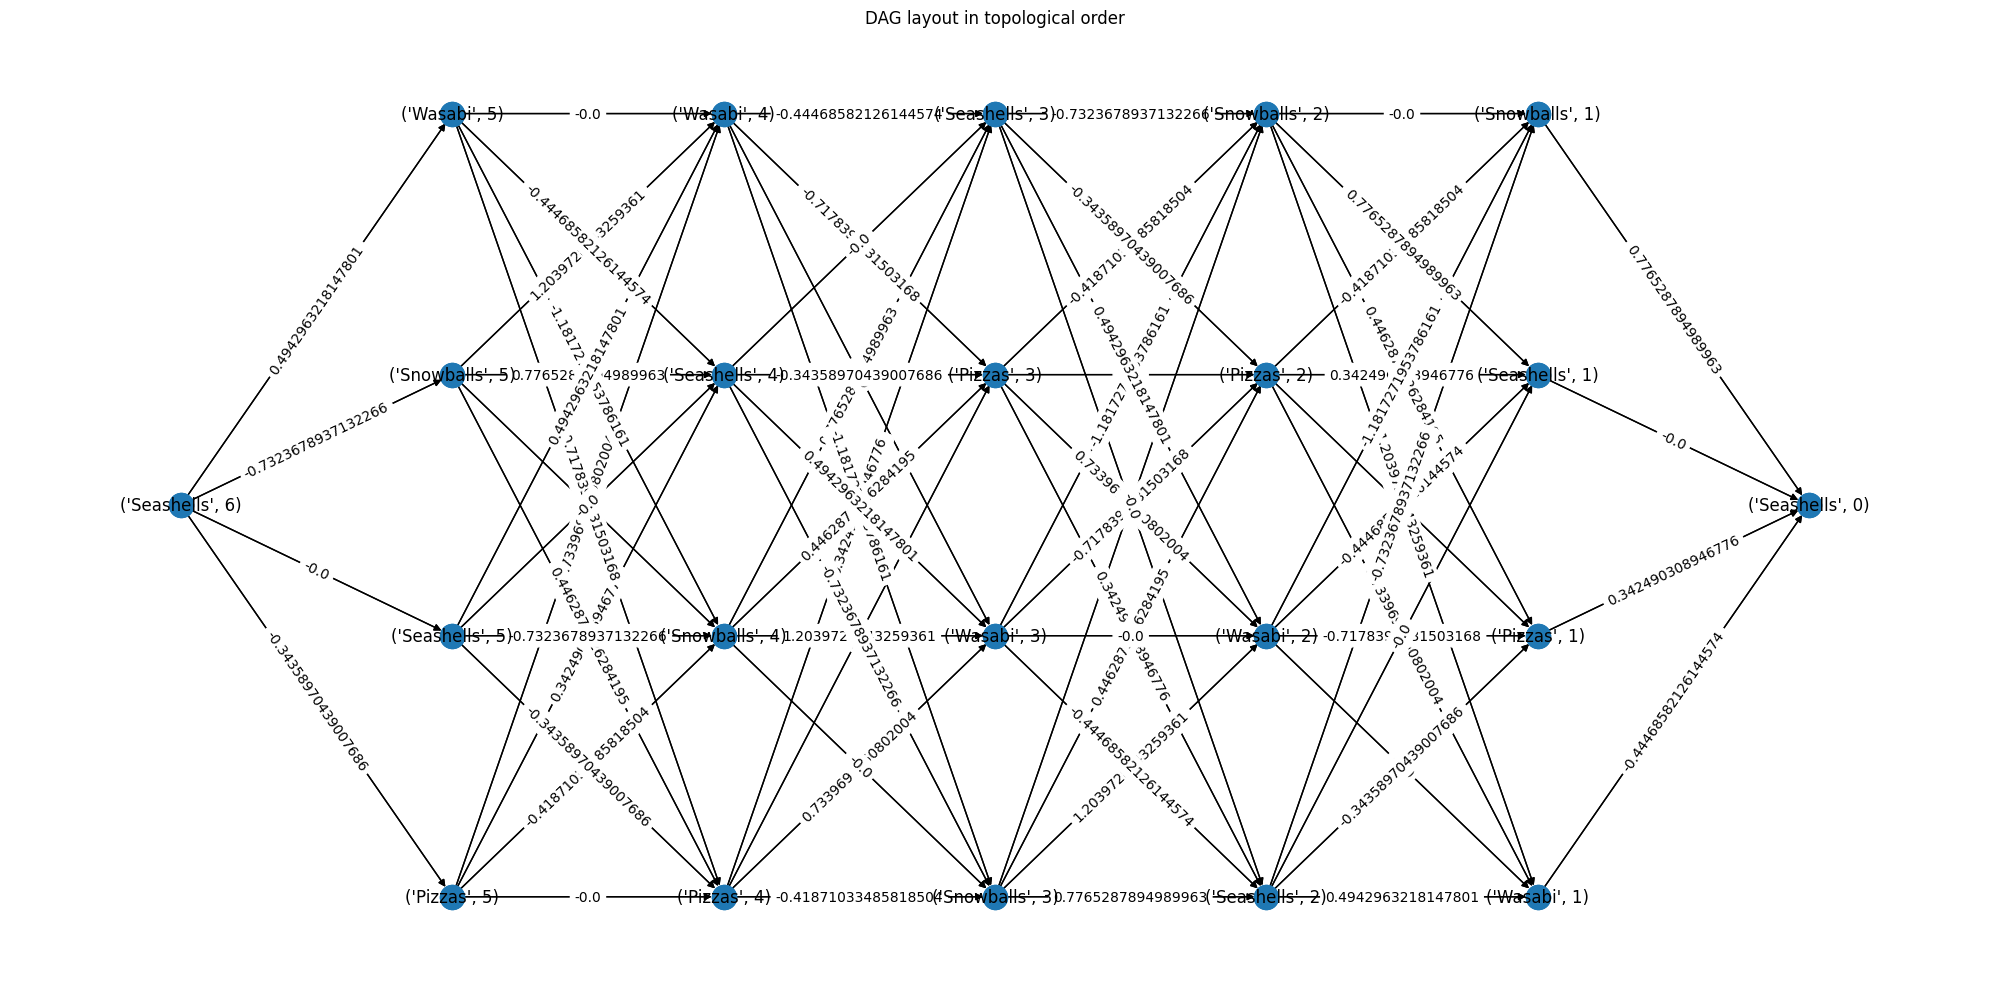

In [1]:
import functools
import networkx as nx
import matplotlib.pyplot as plt
import math
import functools

currencies = ["Pizzas", "Wasabi", "Snowballs", "Seashells"]

trading_table = {"Pizzas": {"Pizzas": 1, "Wasabi": 0.48, "Snowballs": 1.52, "Seashells": 0.71},
                 "Wasabi": {"Pizzas": 2.05, "Wasabi": 1, "Snowballs": 3.26, "Seashells": 1.56},
                 "Snowballs": {"Pizzas": 0.64, "Wasabi": 0.3, "Snowballs": 1, "Seashells": 0.46},
                 "Seashells": {"Pizzas": 1.41, "Wasabi": 0.61, "Snowballs": 2.08, "Seashells": 1}}

steps = 6

G = nx.DiGraph()
G.add_nodes_from((currency, i) for currency in ["Pizzas", "Snowballs", "Wasabi"] for i in range(steps - 1, 0, -1))
G.add_nodes_from(("Seashells", i) for i in range(0, steps + 1))

for currency, trades_remaining in G.nodes:
    if trades_remaining == 0:
        continue
    elif trades_remaining == 1:
        G.add_edge((currency, trades_remaining), ("Seashells", 0), weight=-math.log(trading_table[currency]["Seashells"]))
    else:
        for curr in currencies:
            G.add_edge((currency, trades_remaining), (curr, trades_remaining - 1), weight=-math.log(trading_table[currency][curr]))

for layer, nodes in enumerate(nx.topological_generations(G)):
    # `multipartite_layout` expects the layer as a node attribute, so add the
    # numeric layer value as a node attribute
    for node in nodes:
        G.nodes[node]["layer"] = layer

# Compute the multipartite_layout using the "layer" node attribute
pos = nx.multipartite_layout(G, subset_key="layer")

fig, ax = plt.subplots(figsize=(20,10))

nx.draw(G,pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx(G, pos=pos, ax=ax)
nx.draw_networkx_edge_labels(G, pos=pos, ax=ax, edge_labels=labels)

ax.set_title("DAG layout in topological order")
fig.tight_layout()
#plt.show()

for k in range(steps):
    best_path = nx.bellman_ford_path(G, ("Seashells", steps), ("Seashells", k))
    expected_arbitrage = math.exp(-nx.bellman_ford_path_length(G, ("Seashells", steps), ("Seashells", k)))
    actual_arbitrage = functools.reduce(lambda x, y: x * y, (trading_table[best_path[i][0]][best_path[i+1][0]] for i in range(len(best_path) - 1)))
    starting_amount = 2000000
    print(k, best_path)
    print(f"Expected Arbitrage: {expected_arbitrage}, Actual Arbitrage: {actual_arbitrage}")
    print(f"Starting Amount: {starting_amount} seashells, After Trades: {starting_amount * actual_arbitrage}")